<a href="https://colab.research.google.com/github/JoMihye/Project/blob/master/code/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls -la "/content/gdrive/MyDrive/ColabNotebooks/darknet"

total 32
drwx------ 2 root root 4096 Jul 22 05:08 apple_img
drwx------ 2 root root 4096 Jul 21 04:12 backup
drwx------ 2 root root 4096 Jul 21 02:51 bin
drwx------ 2 root root 4096 Jul 21 04:11 cfg
drwx------ 2 root root 4096 Jul 21 02:51 cuDNN
drwx------ 2 root root 4096 Jul 21 04:11 custom
drwx------ 2 root root 4096 Jul 21 04:10 data
drwx------ 2 root root 4096 Jul 21 02:51 weights


In [ ]:
!ls -la /usr/local/cuda/include/cudnn.h  # cuda 설치 여부 확인 (보통 설치 안 되어있음.)

ls: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory


# (2) Install CUDA, cuDNN

Download cuDNN File https://developer.nvidia.com/rdp/cudnn-download

Unzip the cuDNN from Google Drive to Colab /usr/local/cuda folder

In [ ]:
!tar -xzvf /content/gdrive/MyDrive/ColabNotebooks/darknet/cuDNN/cudnn-11.1-linux-x64-v8.0.4.30.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn_version.h | grep CUDNN_MAJOR -A 2 # check version

cuda/include/cudnn.h
cuda/include/cudnn_adv_infer.h
cuda/include/cudnn_adv_train.h
cuda/include/cudnn_backend.h
cuda/include/cudnn_cnn_infer.h
cuda/include/cudnn_cnn_train.h
cuda/include/cudnn_ops_infer.h
cuda/include/cudnn_ops_train.h
cuda/include/cudnn_version.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.8
cuda/lib64/libcudnn.so.8.0.4
cuda/lib64/libcudnn_adv_infer.so
cuda/lib64/libcudnn_adv_infer.so.8
cuda/lib64/libcudnn_adv_infer.so.8.0.4
cuda/lib64/libcudnn_adv_train.so
cuda/lib64/libcudnn_adv_train.so.8
cuda/lib64/libcudnn_adv_train.so.8.0.4
cuda/lib64/libcudnn_cnn_infer.so
cuda/lib64/libcudnn_cnn_infer.so.8
cuda/lib64/libcudnn_cnn_infer.so.8.0.4
cuda/lib64/libcudnn_cnn_train.so
cuda/lib64/libcudnn_cnn_train.so.8
cuda/lib64/libcudnn_cnn_train.so.8.0.4
cuda/lib64/libcudnn_ops_infer.so
cuda/lib64/libcudnn_ops_infer.so.8
cuda/lib64/libcudnn_ops_infer.so.8.0.4
cuda/lib64/libcudnn_ops_train.so
cuda/lib64/libcudnn_ops_train.so.8
cuda/lib64/libcudnn_o

# (3) Install DarkNet

설치 과정 및 코드는 install_darknet.ipynb 참조

현 시트에서는 설치된 Darknet 이용

In [ ]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [ ]:
!ls -la '/content/gdrive/MyDrive/ColabNotebooks/darknet/bin/darknet'

!cp /content/gdrive/MyDrive/ColabNotebooks/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 6845696 Jul 21 04:31 /content/gdrive/MyDrive/ColabNotebooks/darknet/bin/darknet


In [ ]:
%cd /content/darknet/

/content/darknet


In [ ]:
# 파일 참조 준비
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/weights' .
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/cfg' .
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/data' .
!cp -r '/content/gdrive/MyDrive/ColabNotebooks/darknet/apple_img' .
!cp -r "/content/gdrive/MyDrive/ColabNotebooks/darknet/custom" .
%ls

apple_img/  backup/  cfg/  custom/  darknet*  data/  predictions.jpg  weights/


In [ ]:
!cp -r "/content/gdrive/MyDrive/ColabNotebooks/darknet/backup" .

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
def download(path):
  from google.colab import files
  files.download(path)

# (4) Test YOLO 

 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.40

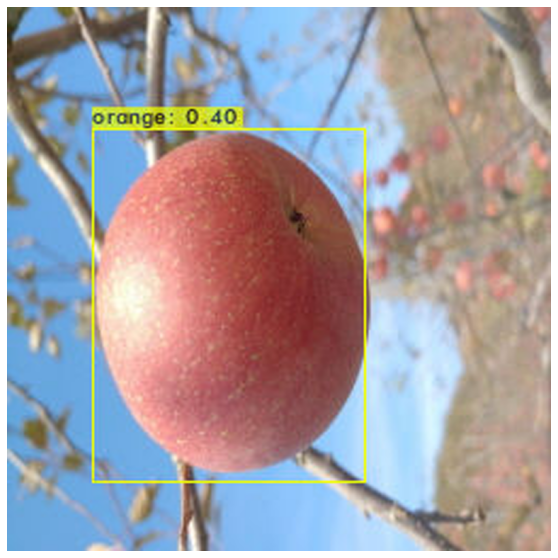

In [ ]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/apple_0_011.jpg
imShow('predictions.jpg')

# (5) Custom YOLO

## 1. LabelImg를 이용하여 사과와 병든 사과를 커스터마이징

## 2. Train

In [ ]:
!./darknet detector train custom/custom_data.data custom/custom-train-yolo.cfg\
    weights/darknet53.conv.74 -dont_show -map

## 3. Test

 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.60

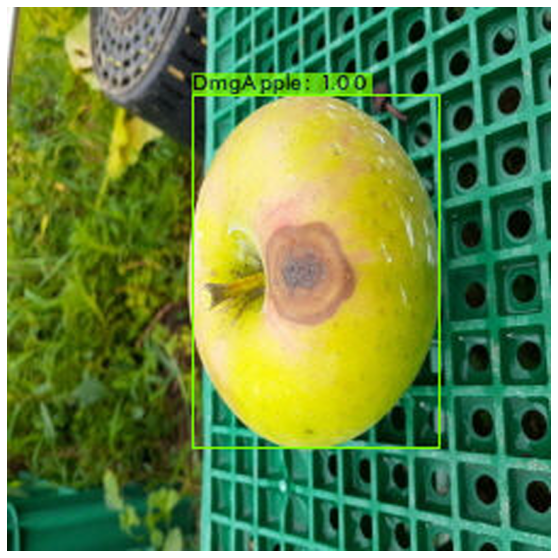

In [ ]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg \
  backup/custom-train-yolo_final.weights apple_img/apple_1_161.jpg -dont_show

imShow('predictions.jpg')

## 4. Apply another photo

 CUDA-version: 11010 (11020), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.60

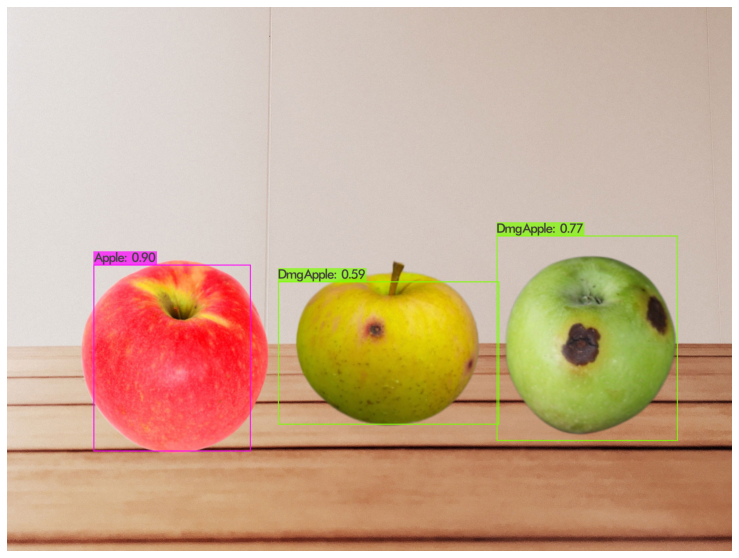

In [ ]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg \
  backup/custom-train-yolo_final.weights apple_img/apple_val/3.jpg -dont_show

imShow('predictions.jpg')